# COVID-19 Tracking for Province of Ontario

These plots use data which has been collected from the Ontario Ministry of Health and Long-Term Care's COVID-19 status page: https://www.ontario.ca/page/2019-novel-coronavirus as collected by the [MIDAS Network](https://github.com/midas-network/COVID-19/tree/master/data/cases/canada/ontario_situation_updates).

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
%config InlineBackend.figure_format = 'retina'

# Set large plotting parameters
plt.rcParams["figure.figsize"] = (20.0, 8.0)
plt.rcParams["figure.titlesize"] = 20
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["lines.markersize"] = 15
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["legend.fontsize"] = 16
plt.rcParams['axes.facecolor'] = 'white'

In [73]:
from datetime import datetime
todaystring = datetime.now().strftime("%Y-%m-%d")

### Data Processing

Read in the data saved in the `midas` directory. These are the same status updates from MOHLTC being saved by [MIDAS](https://github.com/midas-network/COVID-19/tree/master/data/cases/canada/ontario_situation_updates):

In [74]:
!ls ../midas/

Cases_in_Ontario_2020-02-11.csv    Cases_in_Ontario_2020-03-07.csv
Cases_in_Ontario_2020-02-12.csv    Cases_in_Ontario_2020-03-08.csv
Cases_in_Ontario_2020-02-13.csv    Cases_in_Ontario_2020-03-09.csv
Cases_in_Ontario_2020-02-14.csv    Cases_in_Ontario_2020-03-10.csv
Cases_in_Ontario_2020-02-15.csv    Cases_in_Ontario_2020-03-11.csv
Cases_in_Ontario_2020-02-16.csv    Cases_in_Ontario_2020-03-12.csv
Cases_in_Ontario_2020-02-17.csv    Cases_in_Ontario_2020-03-13.csv
Cases_in_Ontario_2020-02-18.csv    Cases_in_Ontario_2020-03-14.csv
Cases_in_Ontario_2020-02-19.csv    Cases_in_Ontario_2020-03-15.csv
Cases_in_Ontario_2020-02-20.csv    Cases_in_Ontario_2020-03-16.csv
Cases_in_Ontario_2020-02-21.csv    Cases_in_Ontario_2020-03-17.csv
Cases_in_Ontario_2020-02-22.csv    Cases_in_Ontario_2020-03-18.csv
Cases_in_Ontario_2020-02-23.csv    Cases_in_Ontario_2020-03-19.csv
Cases_in_Ontario_2020-02-24.csv    Cases_in_Ontario_2020-03-20.csv
Cases_in_Ontario_2020-02-25.csv    Cases_in_Ontario_2020-03-21

In [75]:
# Read in all the csvs from the directory, put into a list of dataframes and concatenate:
import glob

path = r'../midas/' # use your path
all_files = glob.glob(path + "/Cases*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/Users/mylesharrison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [76]:
frame

,Confirmed negative,Confirmed positive,Currently under investigation,DataUpdated,Deceased,Footnotes,Negative,Presumptive negative,Presumptive positive,Resolved,Total number of patients approved for 2019-nCoV testing to date,Total number of patients approved for COVID-19 testing to date
0,NaN,17,102,2020-03-04 10:30:00 -0500,NaN,Negative: Patient negative based on testing pe...,1216.0,NaN,NaN,3.0,NaN,1338.0
1,NaN,31,112,2020-03-10 10:30:00 -0400,NaN,Negative: Patient negative based on testing pe...,2599.0,NaN,NaN,5.0,NaN,2747.0
2,NaN,31,112,2020-03-10 10:30:00 -0400,NaN,Negative: Patient negative based on testing pe...,2599.0,NaN,NaN,5.0,NaN,2747.0
3,NaN,18,78,2020-03-05 10:30:00 -0500,NaN,Negative: Patient negative based on testing pe...,1466.0,NaN,NaN,4.0,NaN,1566.0
4,NaN,54,536,2020-03-12 10:30:00 -0400,NaN,Negative: Patient negative based on testing pe...,3590.0,NaN,NaN,5.0,NaN,4185.0
5,NaN,24,36,2020-03-07 10:30:00 -0500,NaN,Negative: Patient negative based on testing pe...,1918.0,NaN,NaN,4.0,NaN,1982.0
6,NaN,22,72,2020-03-06 10:30:00 -0500,NaN,Negative: Patient negative based on testing pe...,1665.0,NaN,NaN,4.0,NaN,1763.0
7,NaN,37,465,2020-03-11 10:30:00 -0400,NaN,Negative: Patient negative based on testing pe...,2888.0,NaN,NaN,5.0,NaN,3395.0
8,NaN,140,1316,2020-03-15 17:30:00 -0400,NaN,Negative: Patient negative based on testing pe...,7004.0,NaN,NaN,5.0,NaN,8465.0
9,NaN,15,12,2020-03-02 10:30:00 -0500,NaN,Negative: Patient negative based on testing pe...,975.0,NaN,NaN,3.0,NaN,1005.0


In [77]:
# Convert the DataUpdated column to a datetime
frame['DataUpdated'] = pd.to_datetime(frame['DataUpdated'], utc=True)

# Sort values in ascending chronological order and reset index
frame.sort_values(by='DataUpdated', inplace=True)
frame.reset_index(inplace=True)
frame.drop('index', axis=1, inplace=True)

frame.tail()

,Confirmed negative,Confirmed positive,Currently under investigation,DataUpdated,Deceased,Footnotes,Negative,Presumptive negative,Presumptive positive,Resolved,Total number of patients approved for 2019-nCoV testing to date,Total number of patients approved for COVID-19 testing to date
43,NaN,572,10074,2020-03-24 21:30:00+00:00,8.0,Negative: Patient negative based on testing pe...,21795.0,NaN,NaN,8.0,NaN,32457.0
44,NaN,667,10489,2020-03-25 21:30:00+00:00,13.0,Negative: Patient negative based on testing pe...,24458.0,NaN,NaN,8.0,NaN,35635.0
45,NaN,835,10965,2020-03-26 21:30:00+00:00,15.0,Negative: Patient negative based on testing pe...,26727.0,NaN,NaN,8.0,NaN,38550.0
46,NaN,967,10074,2020-03-27 21:30:00+00:00,18.0,Negative: Patient negative based on testing p...,29967.0,NaN,NaN,8.0,NaN,41032.0
47,NaN,1326,7203,2020-03-29 14:30:00+00:00,21.0,*two deaths not lab confirmed. Negative: Pati...,40630.0,NaN,NaN,8.0,NaN,49186.0


In [78]:
frame['Deceased'] = frame['Deceased'].astype(np.float64)
frame['Currently under investigation'] = frame['Currently under investigation'].astype(np.int64) 

In [79]:
frame

,Confirmed negative,Confirmed positive,Currently under investigation,DataUpdated,Deceased,Footnotes,Negative,Presumptive negative,Presumptive positive,Resolved,Total number of patients approved for 2019-nCoV testing to date,Total number of patients approved for COVID-19 testing to date
0,184.0,3,19,2020-02-11 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,79.0,0.0,NaN,285.0,NaN
1,257.0,2,9,2020-02-12 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,44.0,0.0,1.0,313.0,NaN
2,306.0,2,15,2020-02-13 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,16.0,0.0,1.0,NaN,340.0
3,353.0,2,8,2020-02-14 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,0.0,0.0,1.0,NaN,364.0
4,353.0,2,8,2020-02-14 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,0.0,0.0,1.0,NaN,364.0
5,353.0,2,8,2020-02-14 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,0.0,0.0,1.0,NaN,364.0
6,399.0,2,0,2020-02-17 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,0.0,0.0,1.0,NaN,402.0
7,418.0,2,0,2020-02-18 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,0.0,0.0,1.0,NaN,421.0
8,436.0,2,17,2020-02-19 15:30:00+00:00,NaN,Confirmed negative: Patient negative based on ...,NaN,0.0,0.0,1.0,NaN,456.0
9,NaN,1,14,2020-02-20 15:30:00+00:00,NaN,Negative: Patient negative based on testing pe...,462.0,NaN,0.0,2.0,NaN,479.0


In [80]:
# Combine the columns for presumed +ve/-ve and confirmed +ve/-ve due to schema change
frame['presumed_or_confirmed_positive'] = frame['Presumptive positive'].fillna(0) + \
                                          frame['Confirmed positive'].fillna(0)

frame['presumed_or_confirmed_negative'] = frame['Presumptive negative'].fillna(0) + \
                                          frame['Confirmed negative'].fillna(0) + frame['Negative'].fillna(0)

# Combine columns for total approved for testing
frame['total_approved_for_testing'] = \
    frame['Total number of patients approved for 2019-nCoV testing to date'].fillna(0) + \
    frame['Total number of patients approved for COVID-19 testing to date'].fillna(0)

# Calculate column for total tested (-ve + +ve + deceased + resolved)
frame['total_tested'] = frame['presumed_or_confirmed_positive'] + \
                        frame['presumed_or_confirmed_negative'] + \
                        frame['Deceased'].fillna(0) + \
                        frame['Resolved'].fillna(0)

In [81]:
# Check the math: Total approved for testing = total tested + currently under investigation
assert (frame['total_tested'] + frame['Currently under investigation'] == frame['total_approved_for_testing']).all()

AssertionError: 

In [82]:
frame['total_tested'] + frame['Currently under investigation'] - frame['total_approved_for_testing']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    2.0
47    2.0
dtype: float64

In [83]:
# Reorder columns: DataUpdated, original columns (with nans), then calculated columns
frame = frame[['DataUpdated', 'Presumptive negative','Confirmed negative','Negative','Presumptive positive',\
       'Confirmed positive','Resolved','Deceased','Currently under investigation', \
        'Total number of patients approved for 2019-nCoV testing to date', \
        'Total number of patients approved for COVID-19 testing to date', \
      'presumed_or_confirmed_positive', 'presumed_or_confirmed_negative', 'total_approved_for_testing', 'total_tested']]

In [84]:
# Write output
frame.to_csv('../csv/case_statuses_'+todaystring+'.csv')

In [85]:
frame.drop_duplicates(inplace=True)

/Users/mylesharrison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
frame

,DataUpdated,Presumptive negative,Confirmed negative,Negative,Presumptive positive,Confirmed positive,Resolved,Deceased,Currently under investigation,Total number of patients approved for 2019-nCoV testing to date,Total number of patients approved for COVID-19 testing to date,presumed_or_confirmed_positive,presumed_or_confirmed_negative,total_approved_for_testing,total_tested
0,2020-02-11 15:30:00+00:00,79.0,184.0,NaN,0.0,3,NaN,NaN,19,285.0,NaN,3.0,263.0,285.0,266.0
1,2020-02-12 15:30:00+00:00,44.0,257.0,NaN,0.0,2,1.0,NaN,9,313.0,NaN,2.0,301.0,313.0,304.0
2,2020-02-13 15:30:00+00:00,16.0,306.0,NaN,0.0,2,1.0,NaN,15,NaN,340.0,2.0,322.0,340.0,325.0
3,2020-02-14 15:30:00+00:00,0.0,353.0,NaN,0.0,2,1.0,NaN,8,NaN,364.0,2.0,353.0,364.0,356.0
6,2020-02-17 15:30:00+00:00,0.0,399.0,NaN,0.0,2,1.0,NaN,0,NaN,402.0,2.0,399.0,402.0,402.0
7,2020-02-18 15:30:00+00:00,0.0,418.0,NaN,0.0,2,1.0,NaN,0,NaN,421.0,2.0,418.0,421.0,421.0
8,2020-02-19 15:30:00+00:00,0.0,436.0,NaN,0.0,2,1.0,NaN,17,NaN,456.0,2.0,436.0,456.0,439.0
9,2020-02-20 15:30:00+00:00,NaN,NaN,462.0,0.0,1,2.0,NaN,14,NaN,479.0,1.0,462.0,479.0,465.0
10,2020-02-21 15:30:00+00:00,NaN,NaN,483.0,0.0,0,3.0,NaN,12,NaN,498.0,0.0,483.0,498.0,486.0
13,2020-02-24 15:30:00+00:00,NaN,NaN,540.0,0.0,1,3.0,NaN,9,NaN,553.0,1.0,540.0,553.0,544.0


In [87]:
frame['total_approved_for_testing']

0       285.0
1       313.0
2       340.0
3       364.0
6       402.0
7       421.0
8       456.0
9       479.0
10      498.0
13      553.0
14      593.0
15      629.0
16      699.0
18      768.0
20     1005.0
21     1126.0
22     1338.0
23     1566.0
24     1763.0
25     1982.0
26     1982.0
27     2403.0
28     2747.0
30     3395.0
31     4185.0
32     5129.0
33     6648.0
34     8465.0
35    10178.0
36    11171.0
37    16650.0
38    16650.0
39    23384.0
40    23384.0
41    26420.0
42    28506.0
43    32457.0
44    35635.0
45    38550.0
46    41032.0
47    49186.0
Name: total_approved_for_testing, dtype: float64

### Visualization

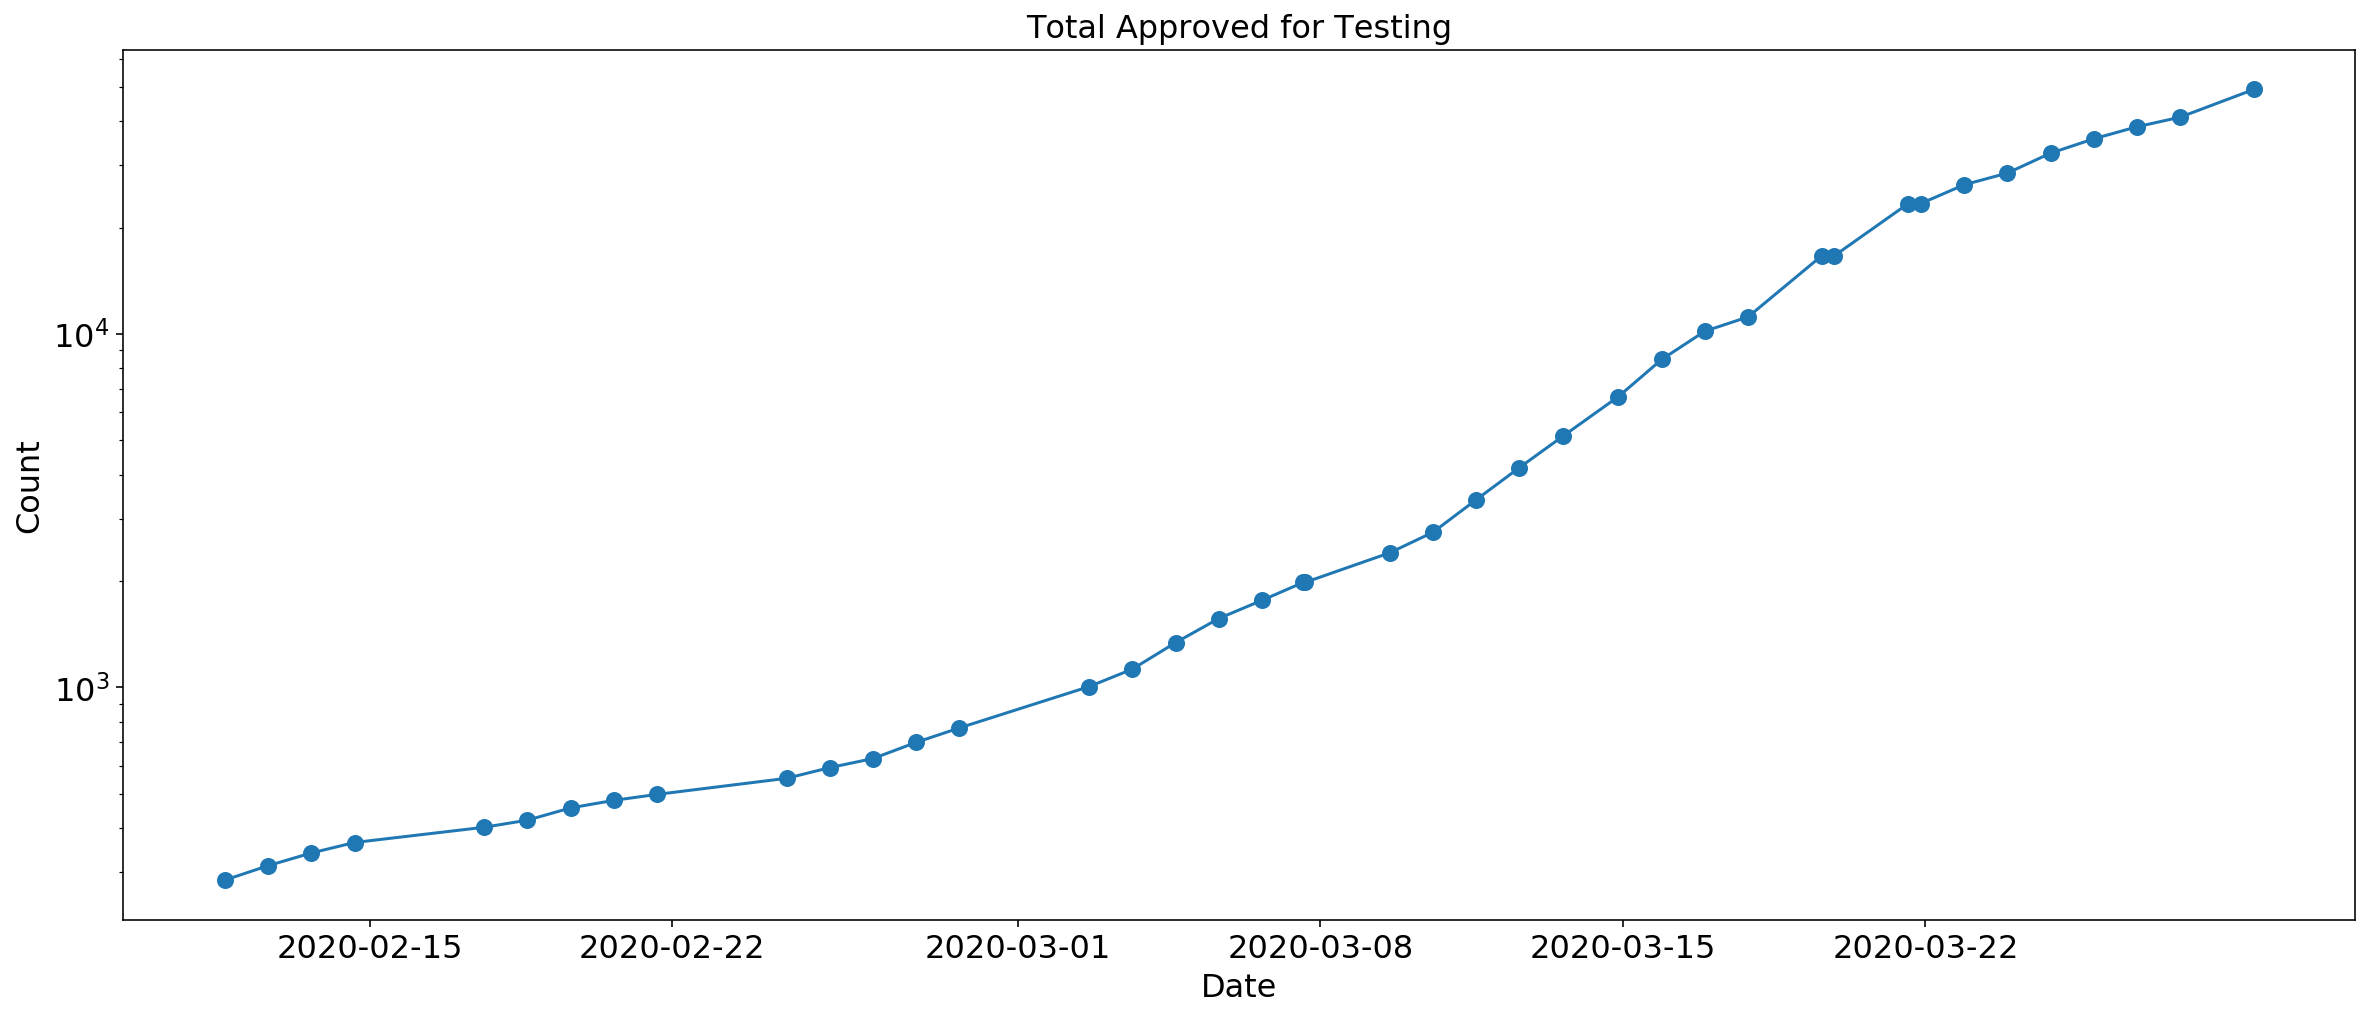

In [88]:
# Total approved for testing
plt.figure
plt.plot(frame['DataUpdated'], frame['total_approved_for_testing'], marker='.')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Approved for Testing')
plt.yscale('log')

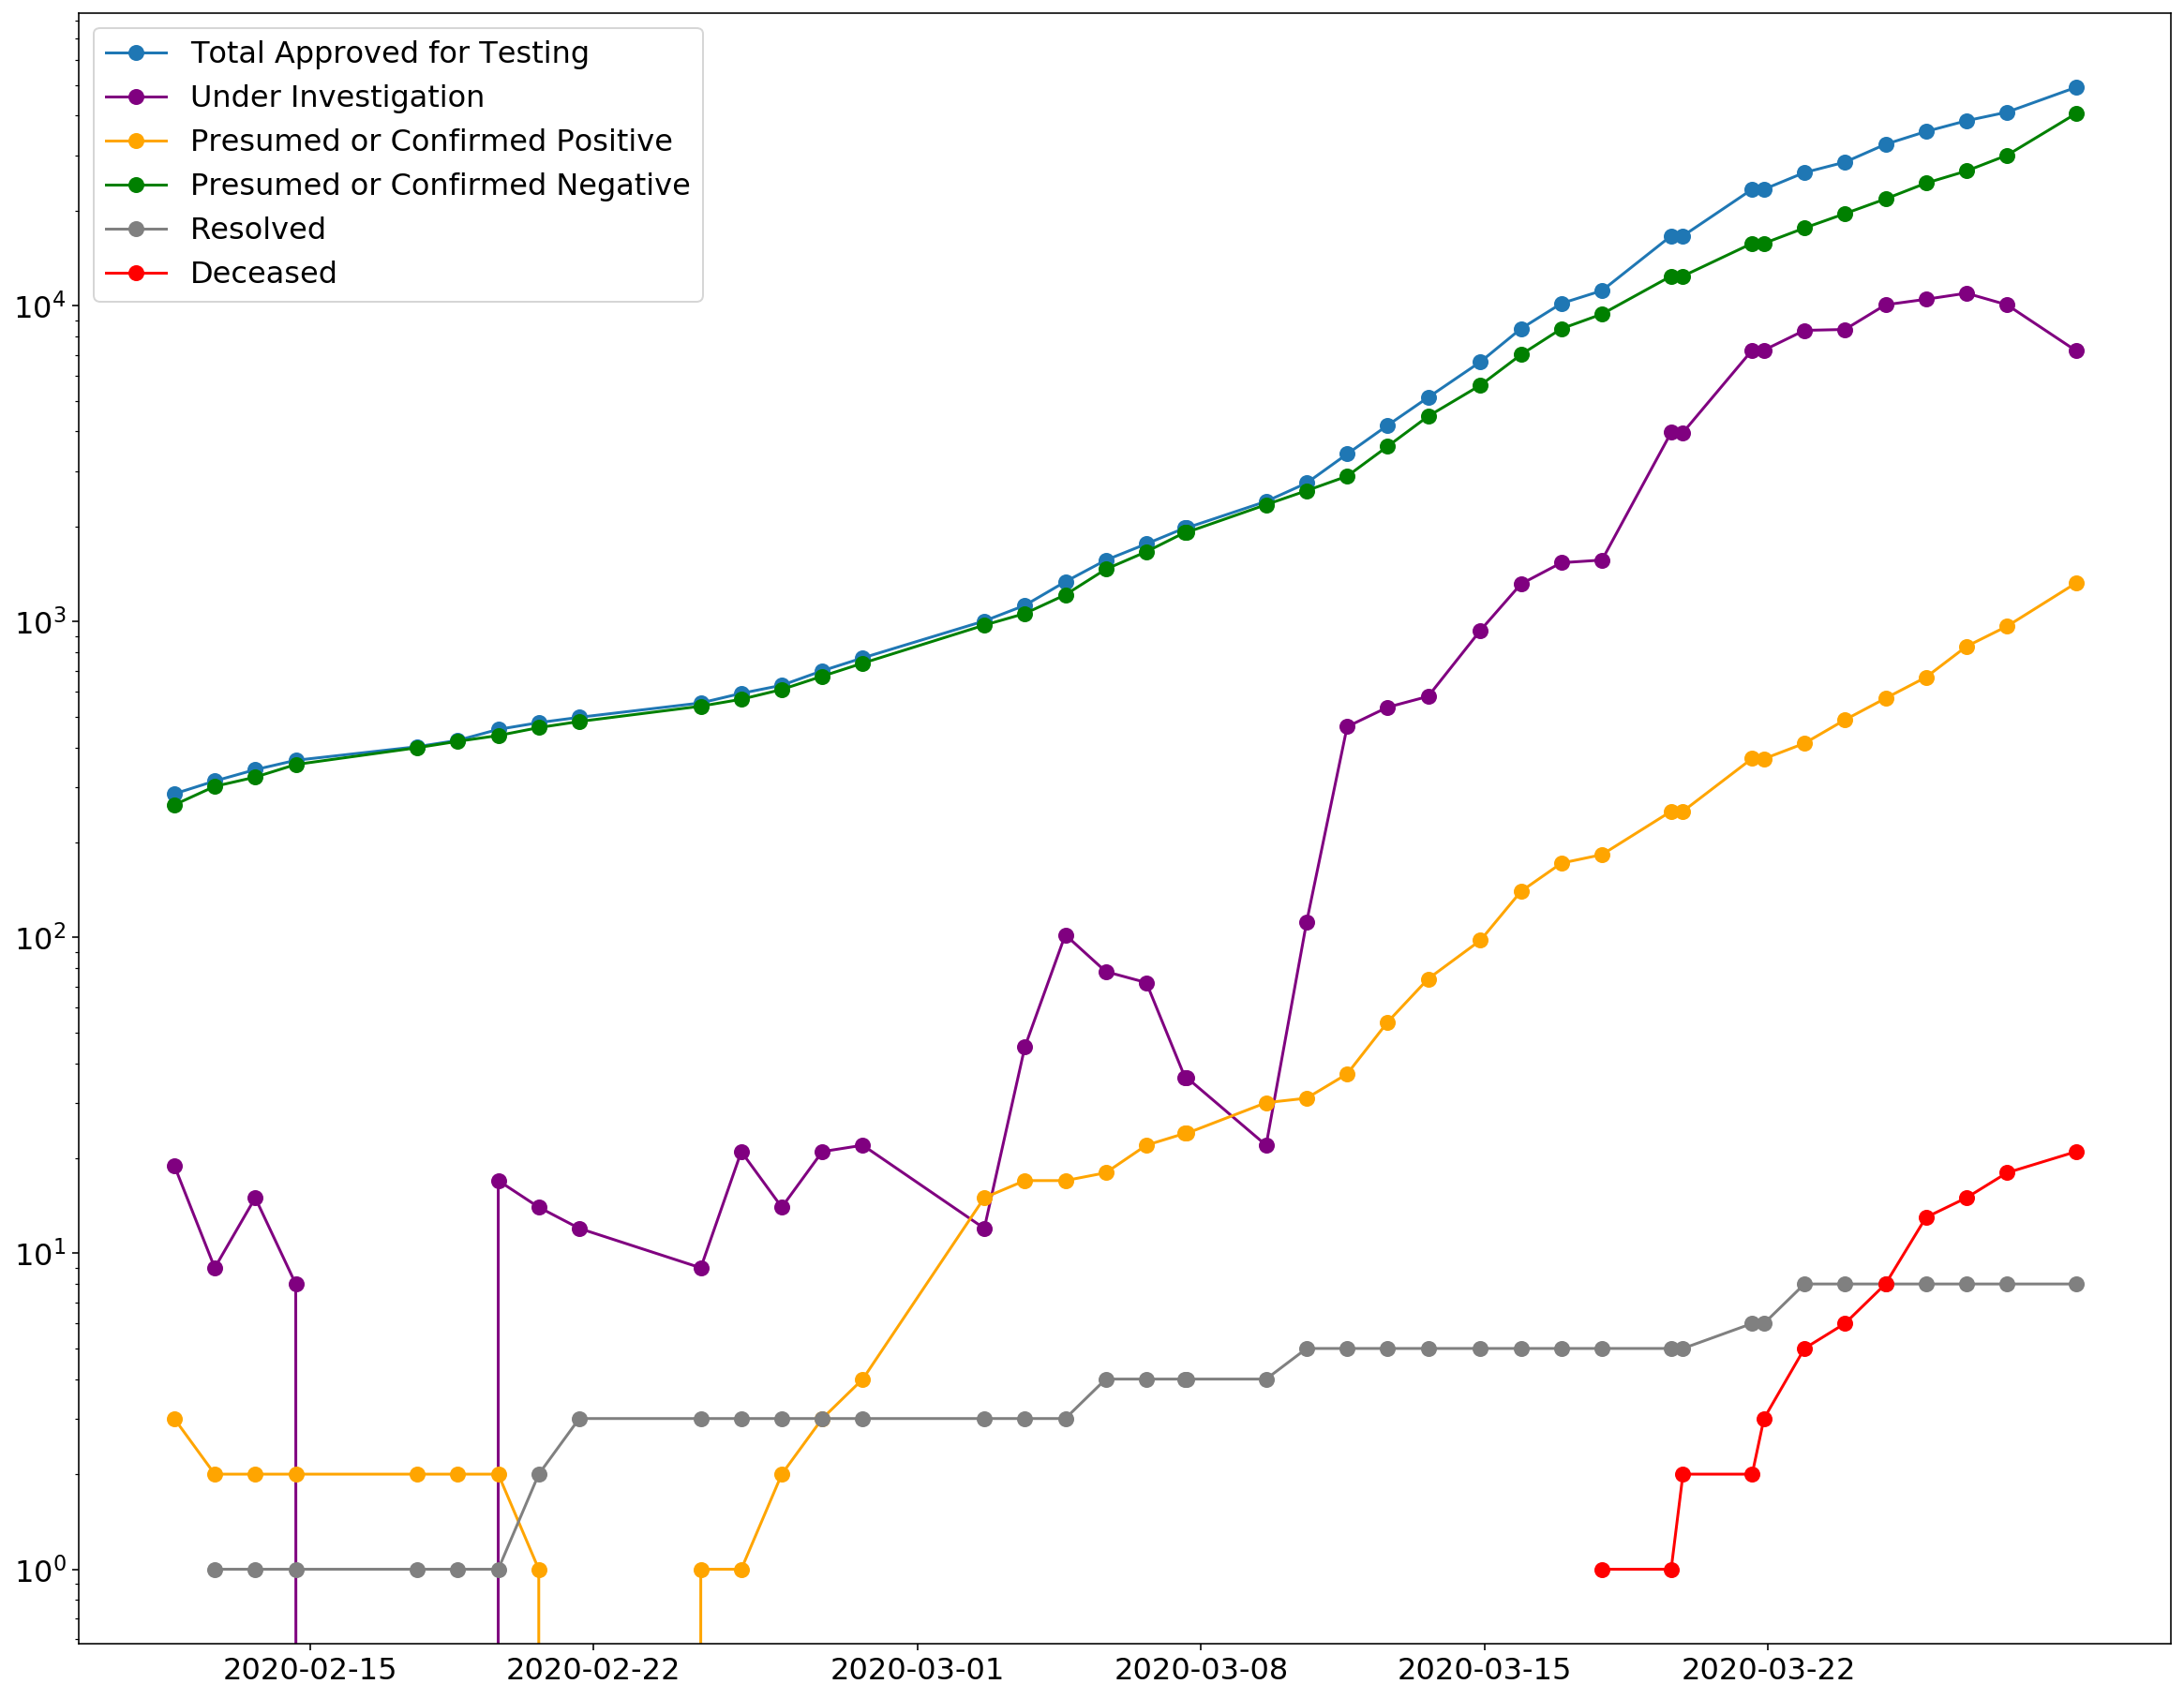

In [89]:
# Combined plot
fig = plt.figure(figsize=(20, 16))
plt.plot(frame['DataUpdated'], frame['total_approved_for_testing'], label='Total Approved for Testing', marker='.')
plt.plot(frame['DataUpdated'], frame['Currently under investigation'], label='Under Investigation', color='purple', marker='.')
plt.plot(frame['DataUpdated'], frame['presumed_or_confirmed_positive'], label='Presumed or Confirmed Positive', color='orange', marker='.')
plt.plot(frame['DataUpdated'], frame['presumed_or_confirmed_negative'], label='Presumed or Confirmed Negative', color='green', marker='.')
plt.plot(frame['DataUpdated'], frame['Resolved'], label='Resolved', color='gray', marker='.')
plt.plot(frame['DataUpdated'], frame['Deceased'], label='Deceased', color='red', marker='.')
plt.legend()
plt.yscale('log')
plt.show()
fig.savefig('../plots/summaryplot_' + todaystring + '.png')

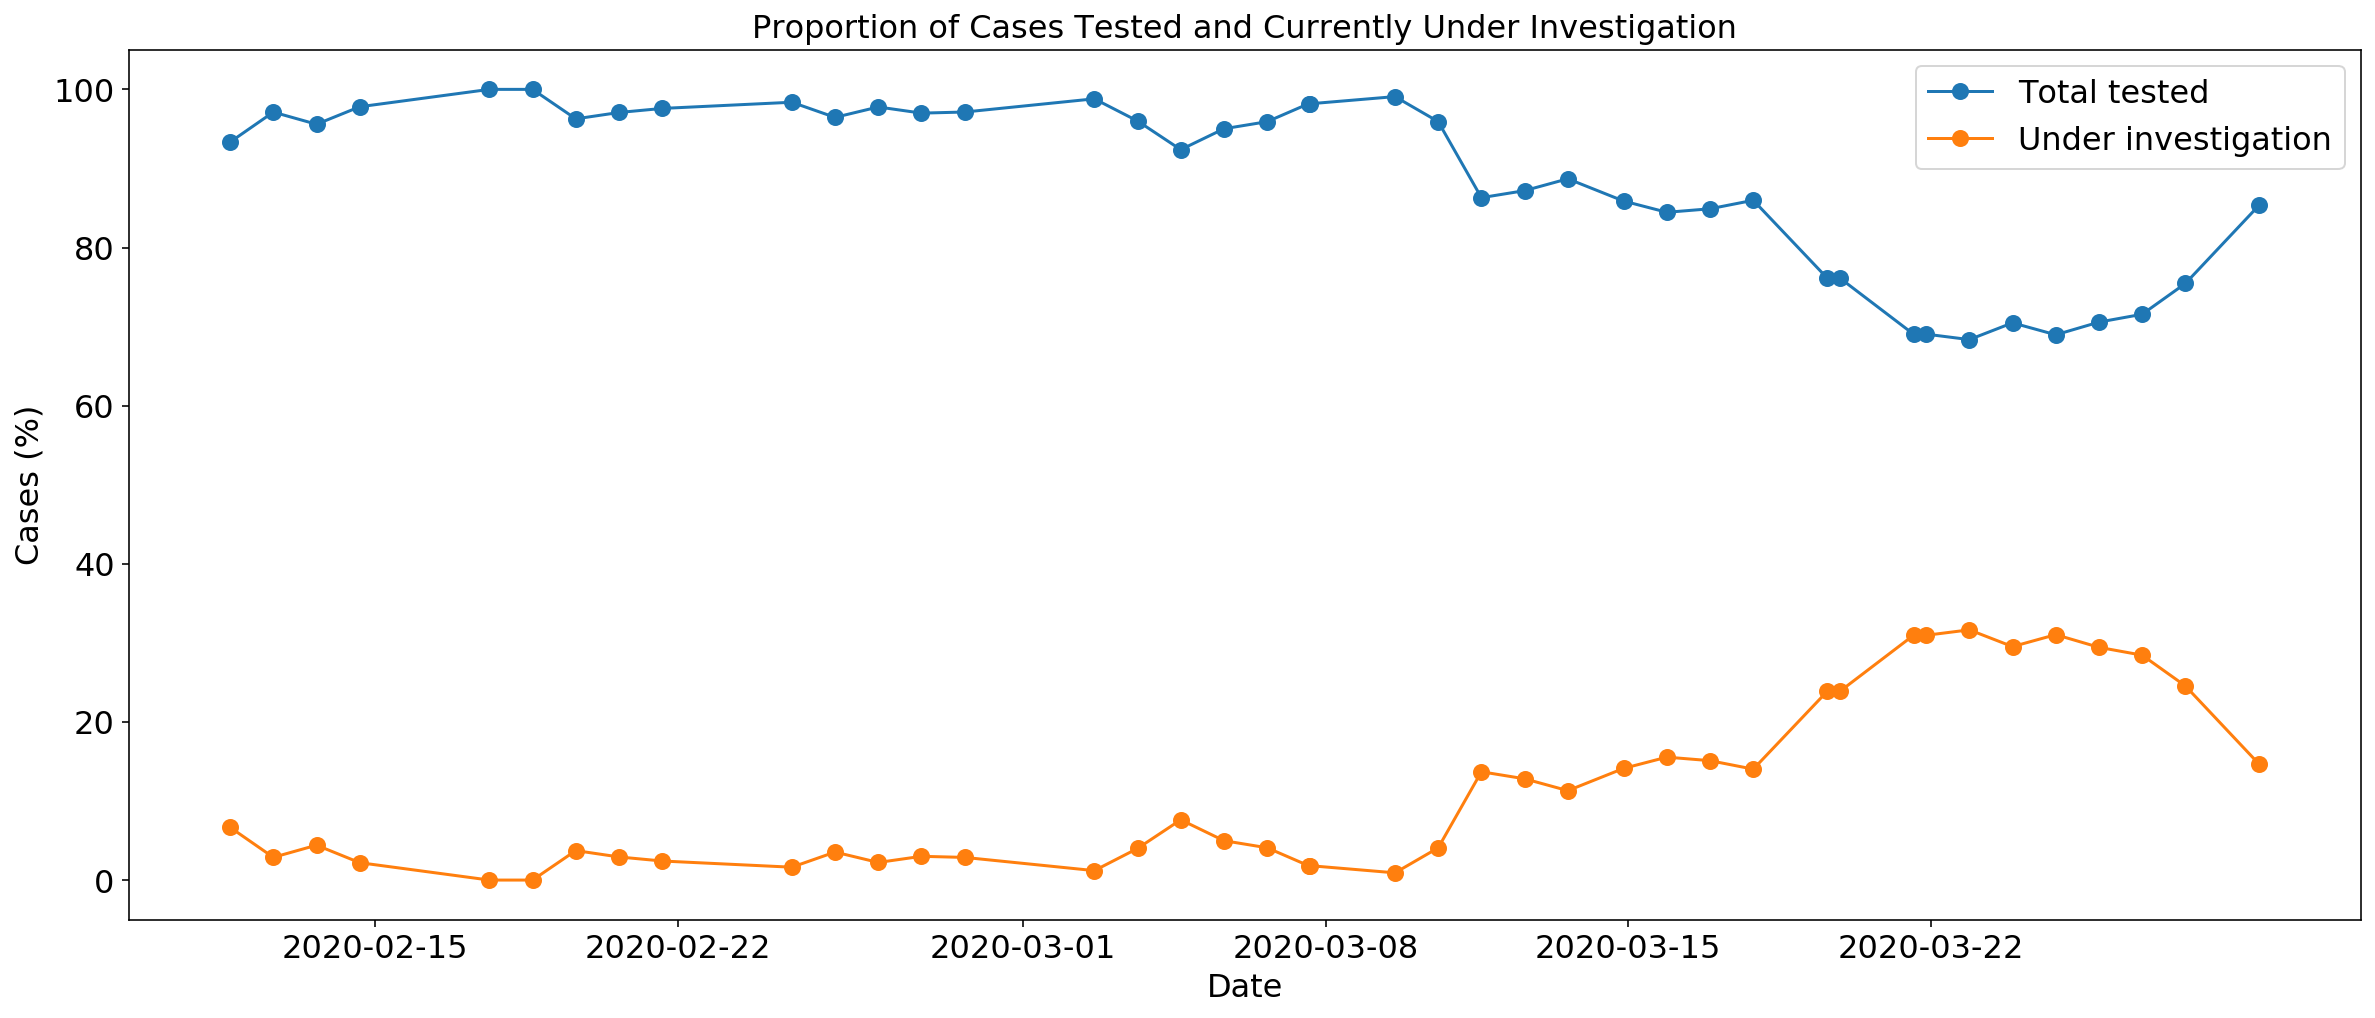

In [90]:
# Proportion tested vs. under investigation
total_vs_investigated_fig = plt.figure()
plt.plot(frame['DataUpdated'], frame['total_tested']/frame['total_approved_for_testing']*100.0, marker='.', label='Total tested')
plt.plot(frame['DataUpdated'], frame['Currently under investigation']/frame['total_approved_for_testing']*100.0, marker='.', label='Under investigation')
plt.xlabel('Date')
plt.ylabel('Cases (%)')
plt.title('Proportion of Cases Tested and Currently Under Investigation')
plt.legend()
plt.show()
total_vs_investigated_fig.savefig('../plots/totalvsinvestigated_' + todaystring + '.png')

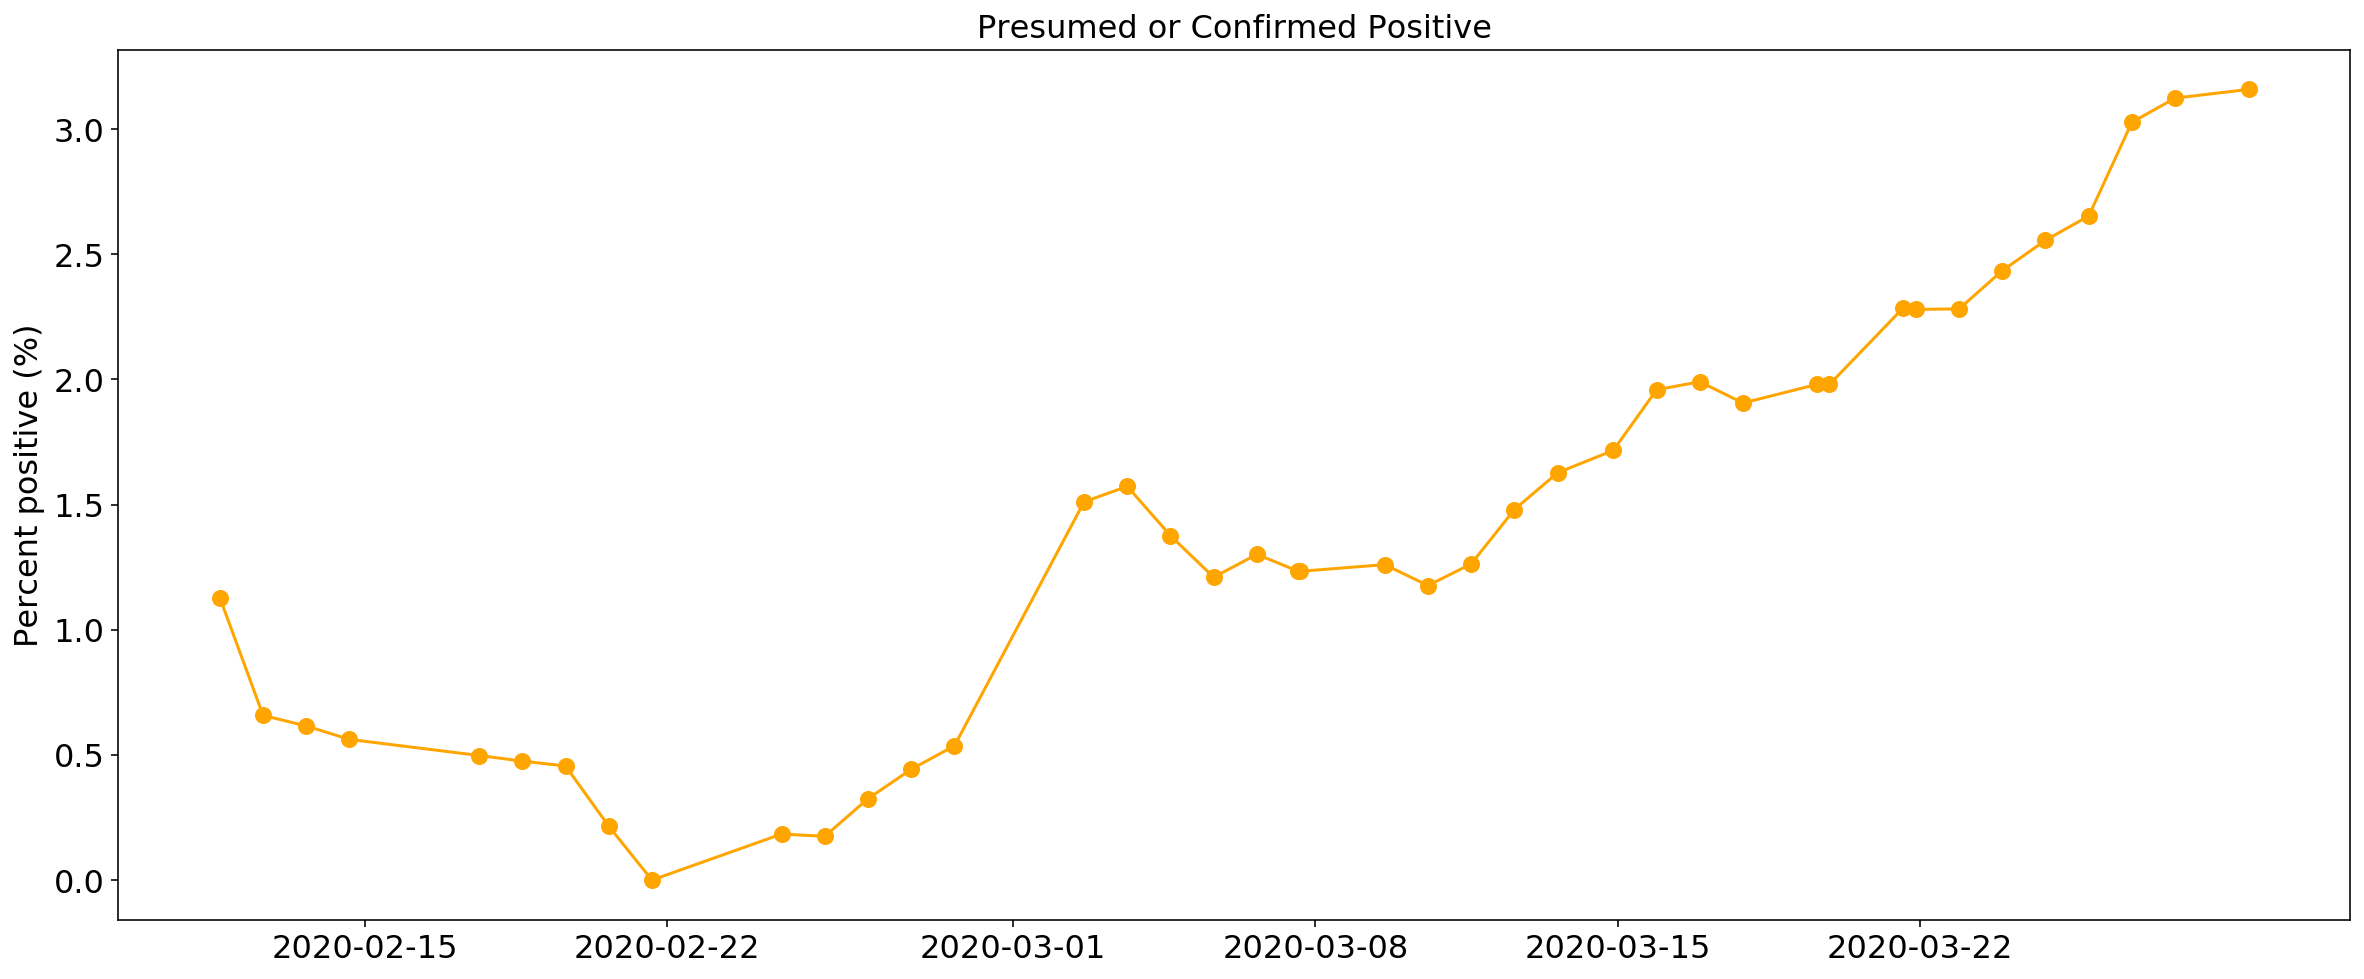

In [91]:
# Positive
positive_fig = plt.figure()
plt.plot(frame['DataUpdated'], frame['presumed_or_confirmed_positive']/frame['total_tested']*100.0, marker='.', color='orange')
plt.ylabel('Percent positive (%)')
plt.title('Presumed or Confirmed Positive')
plt.show()
positive_fig.savefig('../plots/positive_fig_' + todaystring + '.png')

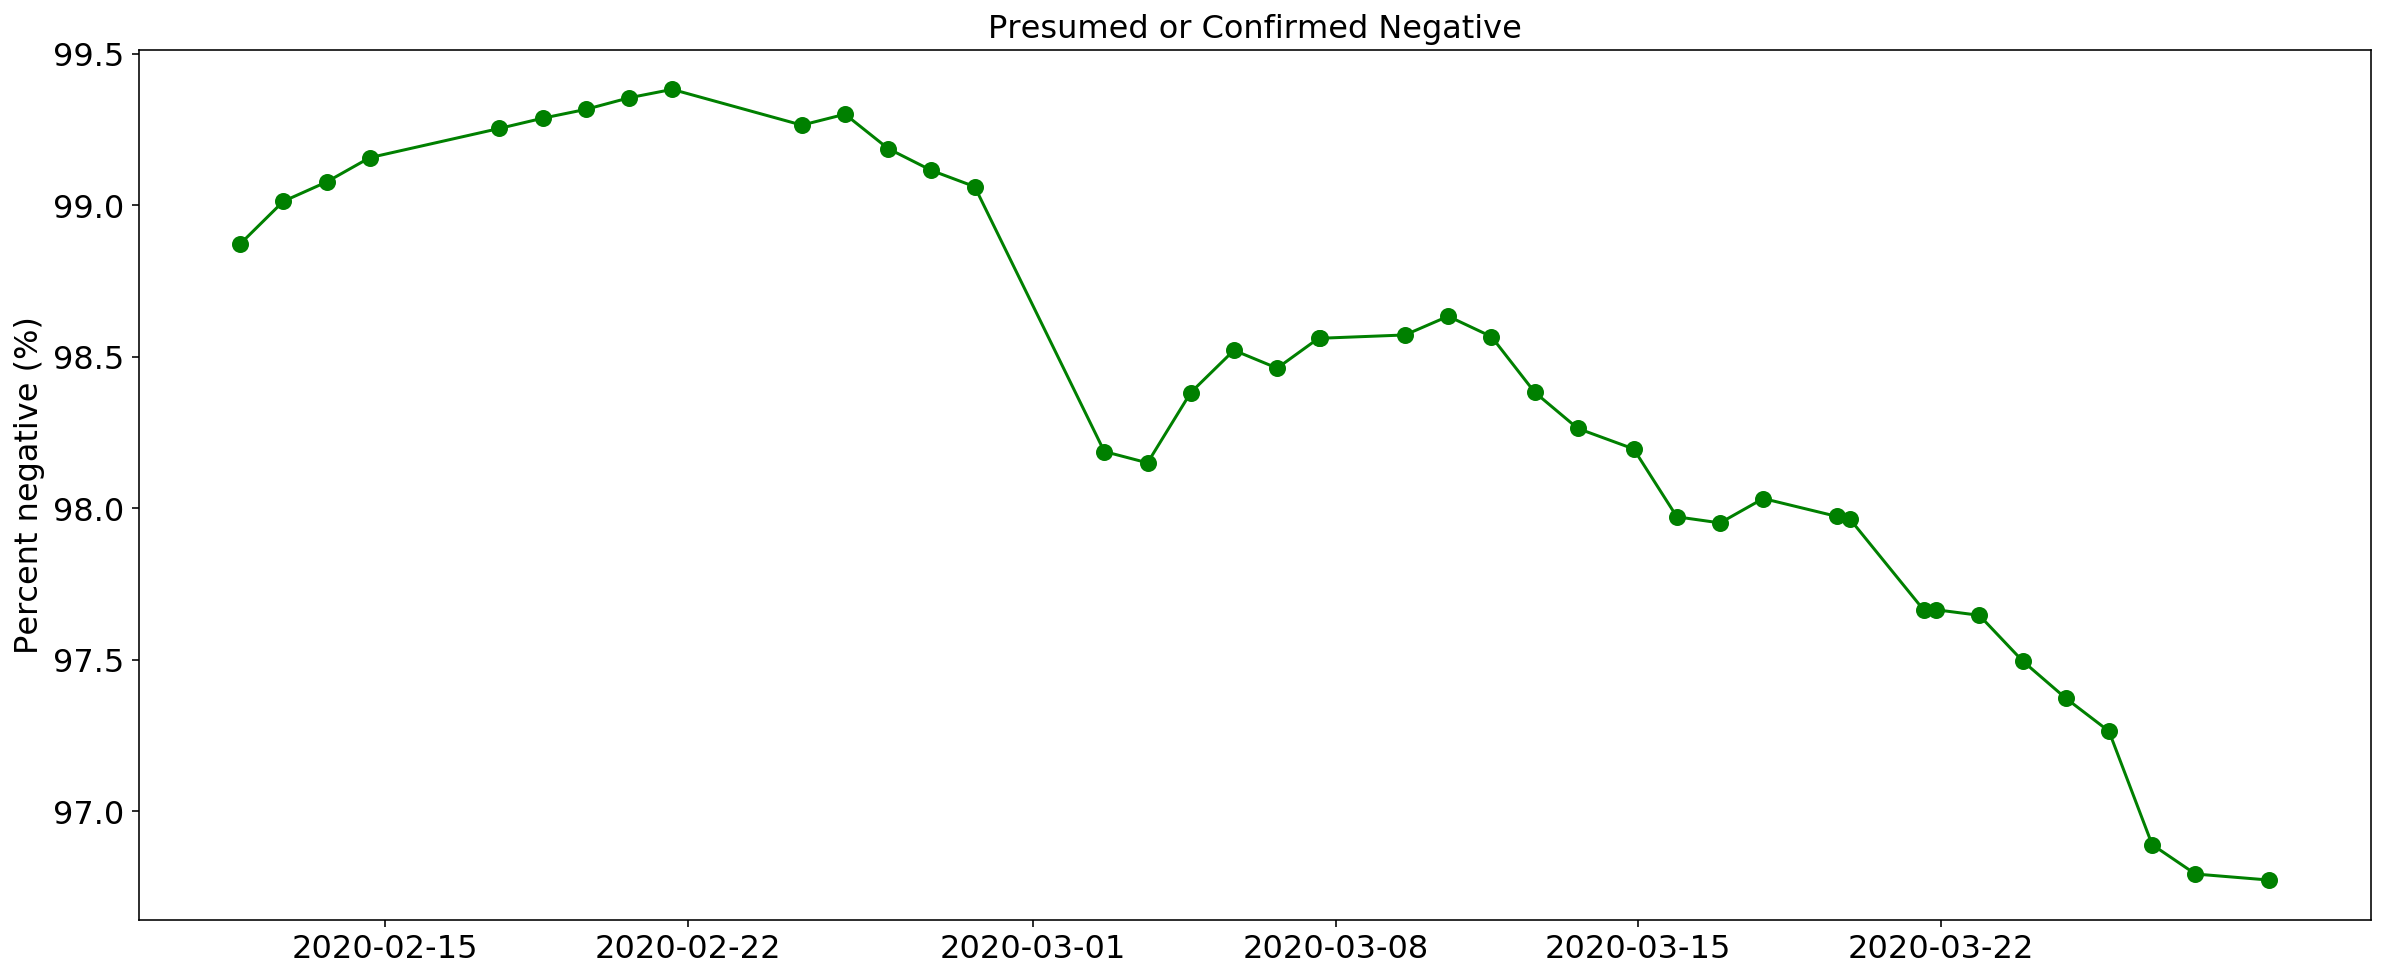

In [92]:
# Positive
negative_fig = plt.figure()
plt.plot(frame['DataUpdated'], frame['presumed_or_confirmed_negative']/frame['total_tested']*100.0, marker='.', color='green')
plt.ylabel('Percent negative (%)')
plt.title('Presumed or Confirmed Negative')
plt.show()
negative_fig.savefig('../plots/negativefig_' + todaystring + '.png')

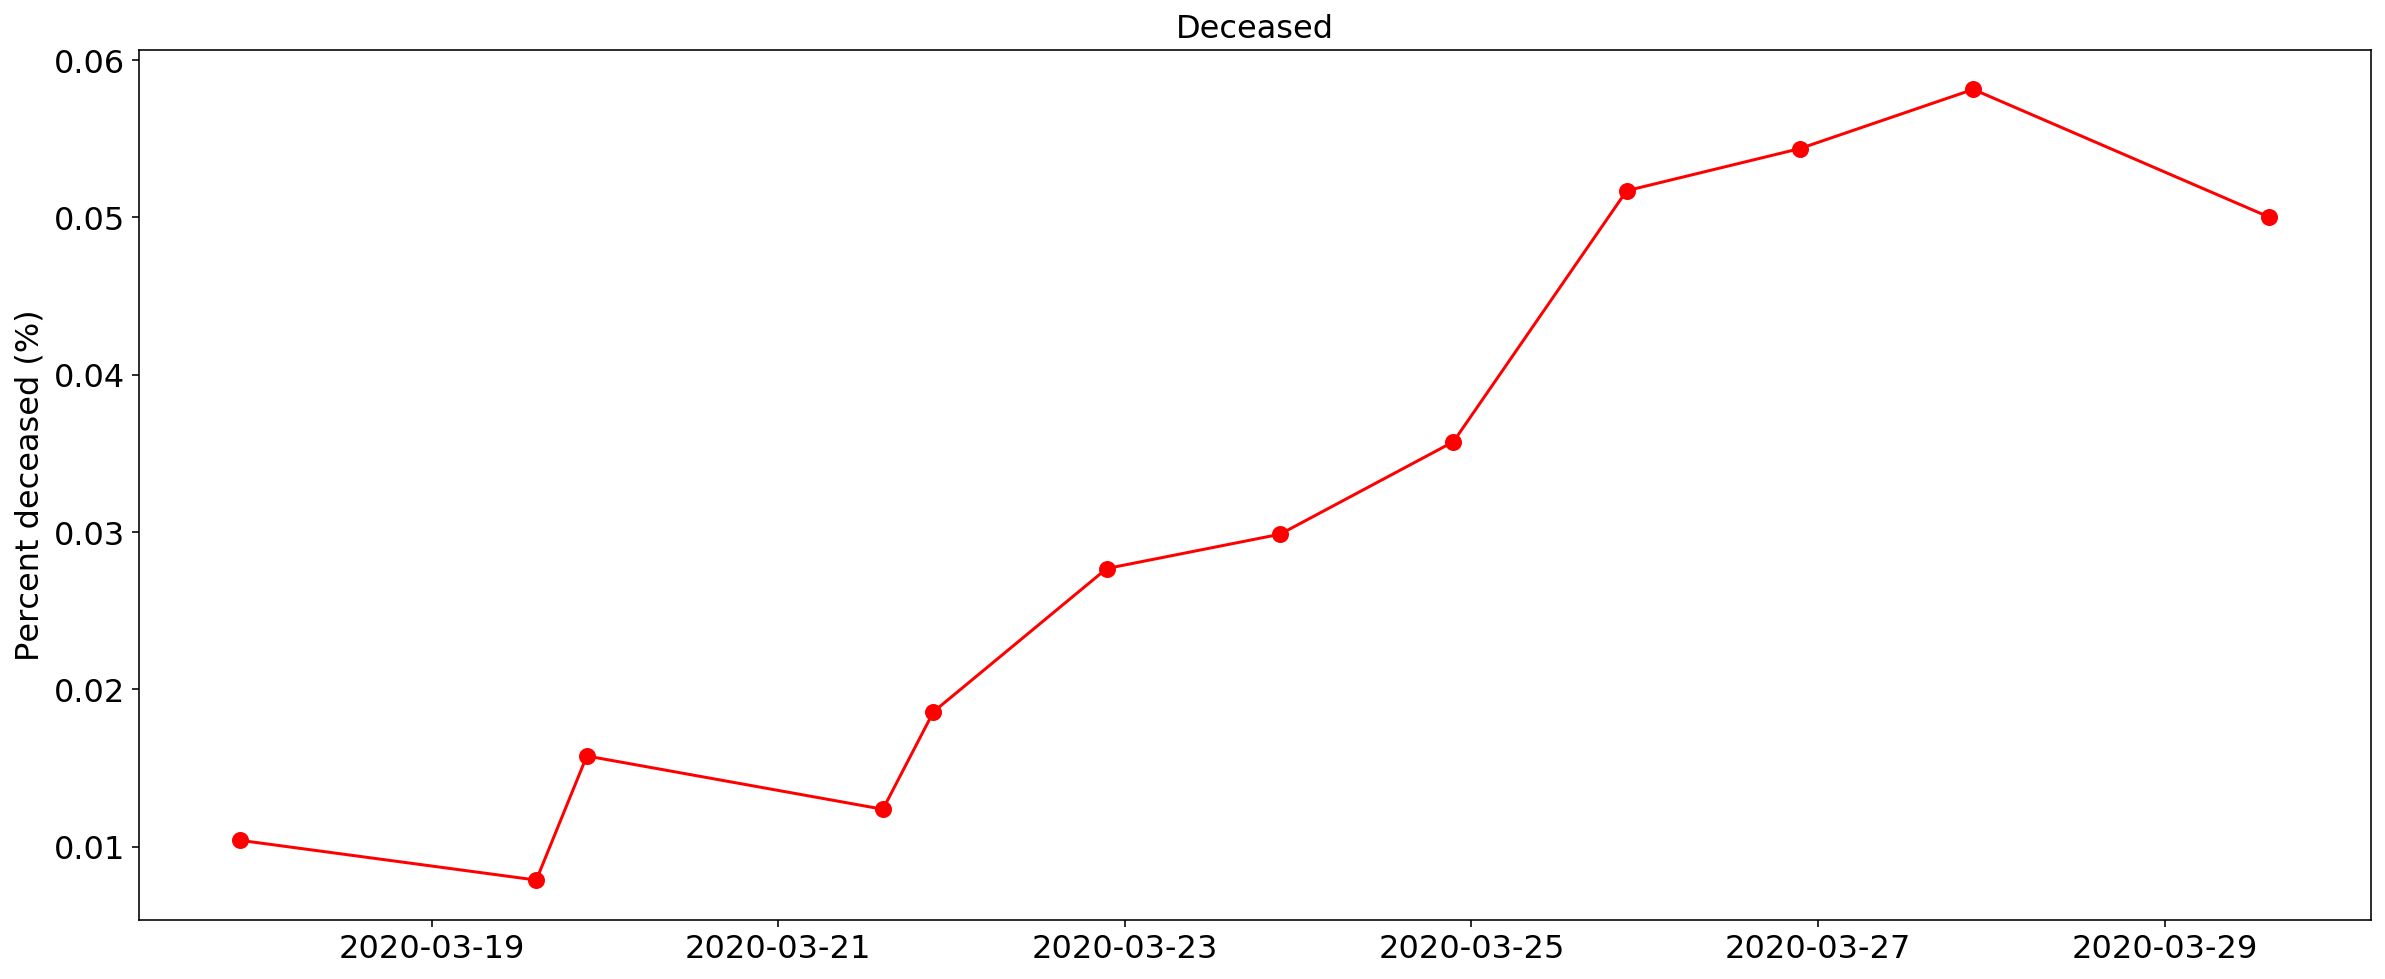

In [93]:
# Deceased
deceased_fig = plt.figure(figsize=(20, 8))
plt.plot(frame['DataUpdated'], frame['Deceased']/frame['total_tested']*100.0, marker='.', color='red')
plt.ylabel('Percent deceased (%)')
plt.title('Deceased')
plt.show()
deceased_fig.savefig('../plots/deceasedplot_' + todaystring + '.png')

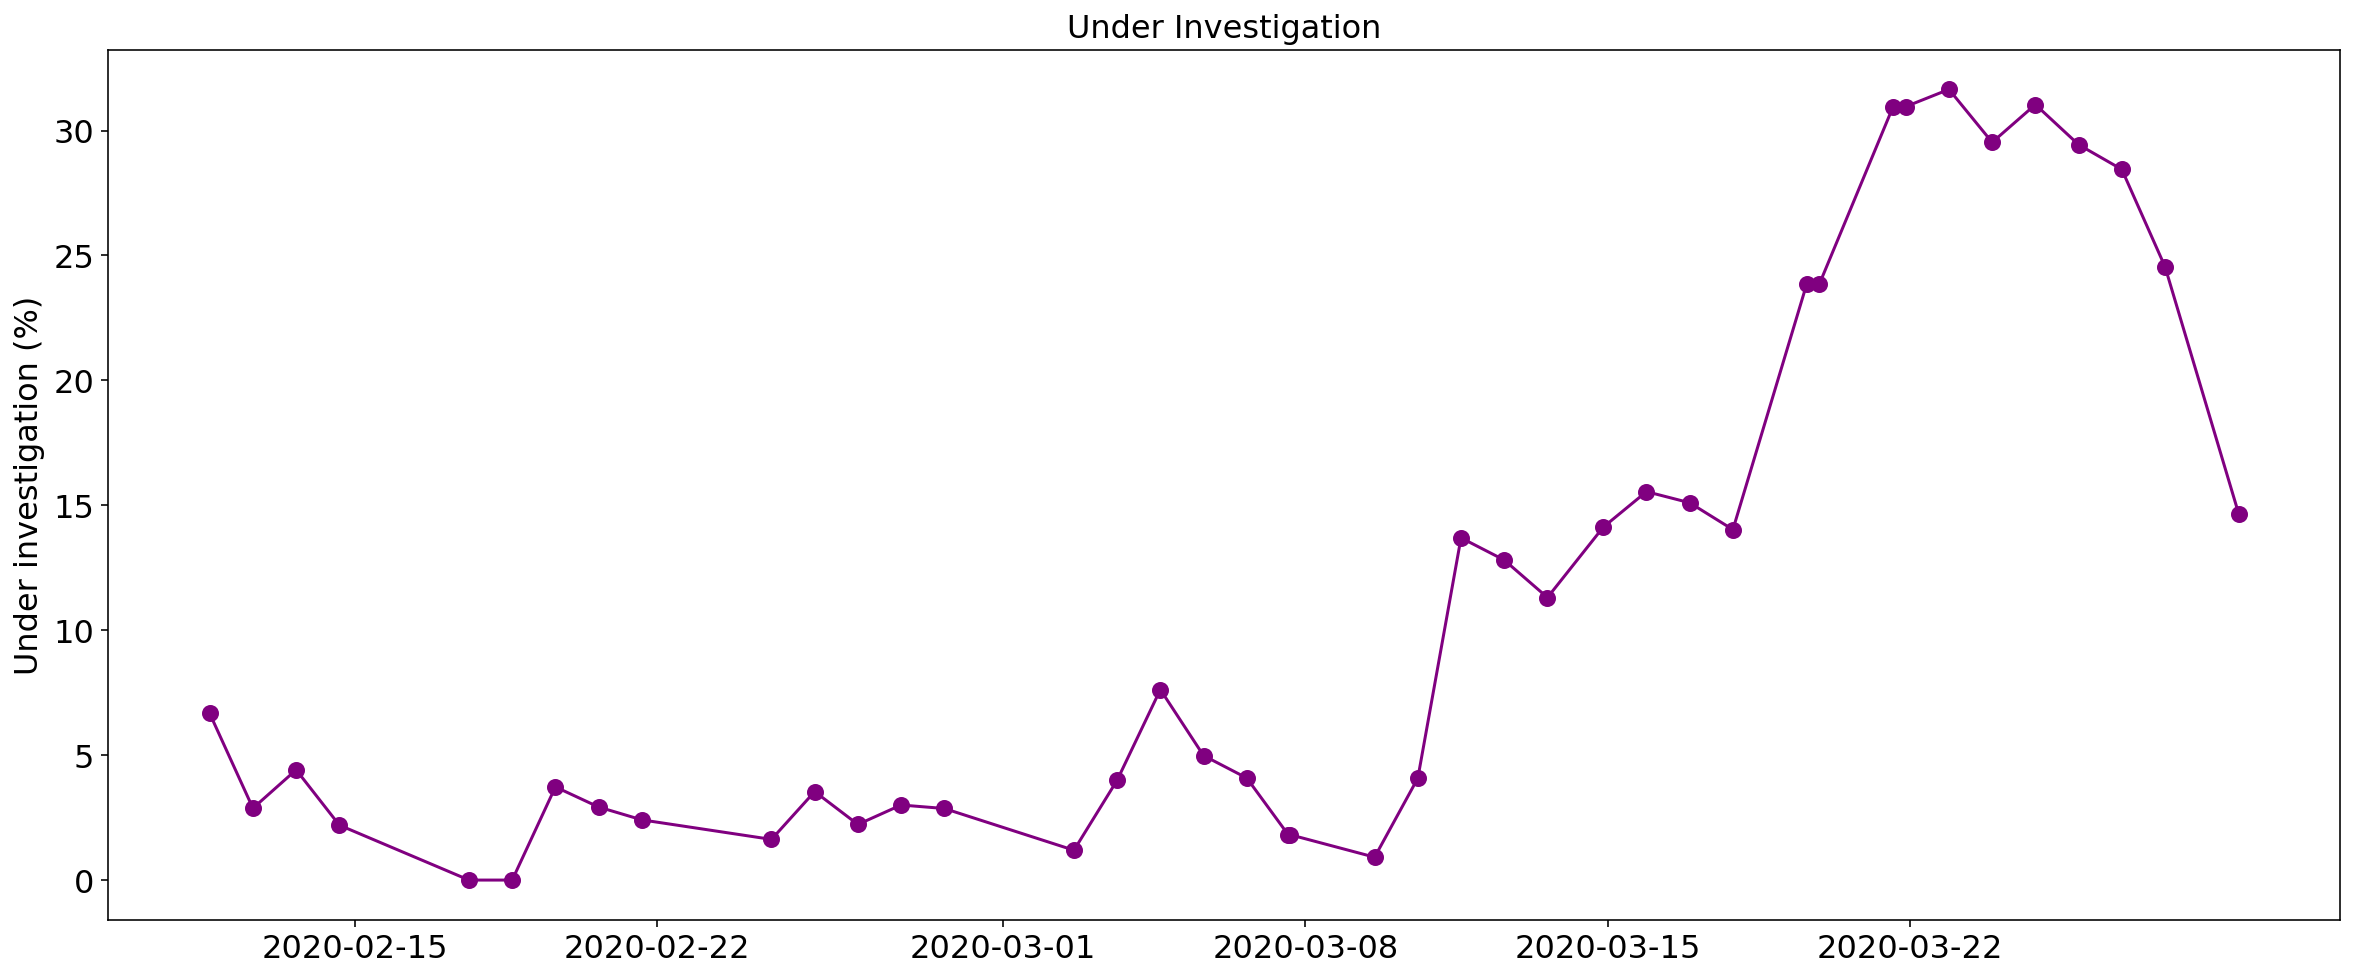

In [94]:
# Under investigation
investigation_fig = plt.figure()
plt.title('Under Investigation')
plt.plot(frame['DataUpdated'], frame['Currently under investigation']/frame['total_approved_for_testing']*100.0, marker='.', color='purple')
plt.ylabel('Under investigation (%)')
plt.show()
investigation_fig.savefig('../plots/investigationplot_' + todaystring + '.png')

In [95]:
frame['Currently under investigation']/frame['total_approved_for_testing']

0     0.066667
1     0.028754
2     0.044118
3     0.021978
6     0.000000
7     0.000000
8     0.037281
9     0.029228
10    0.024096
13    0.016275
14    0.035413
15    0.022258
16    0.030043
18    0.028646
20    0.011940
21    0.039964
22    0.076233
23    0.049808
24    0.040839
25    0.018163
26    0.018163
27    0.009155
28    0.040772
30    0.136966
31    0.128076
32    0.113082
33    0.141245
34    0.155464
35    0.151012
36    0.140274
37    0.238559
38    0.238498
39    0.309571
40    0.309571
41    0.316465
42    0.295271
43    0.310380
44    0.294345
45    0.284436
46    0.245516
47    0.146444
dtype: float64

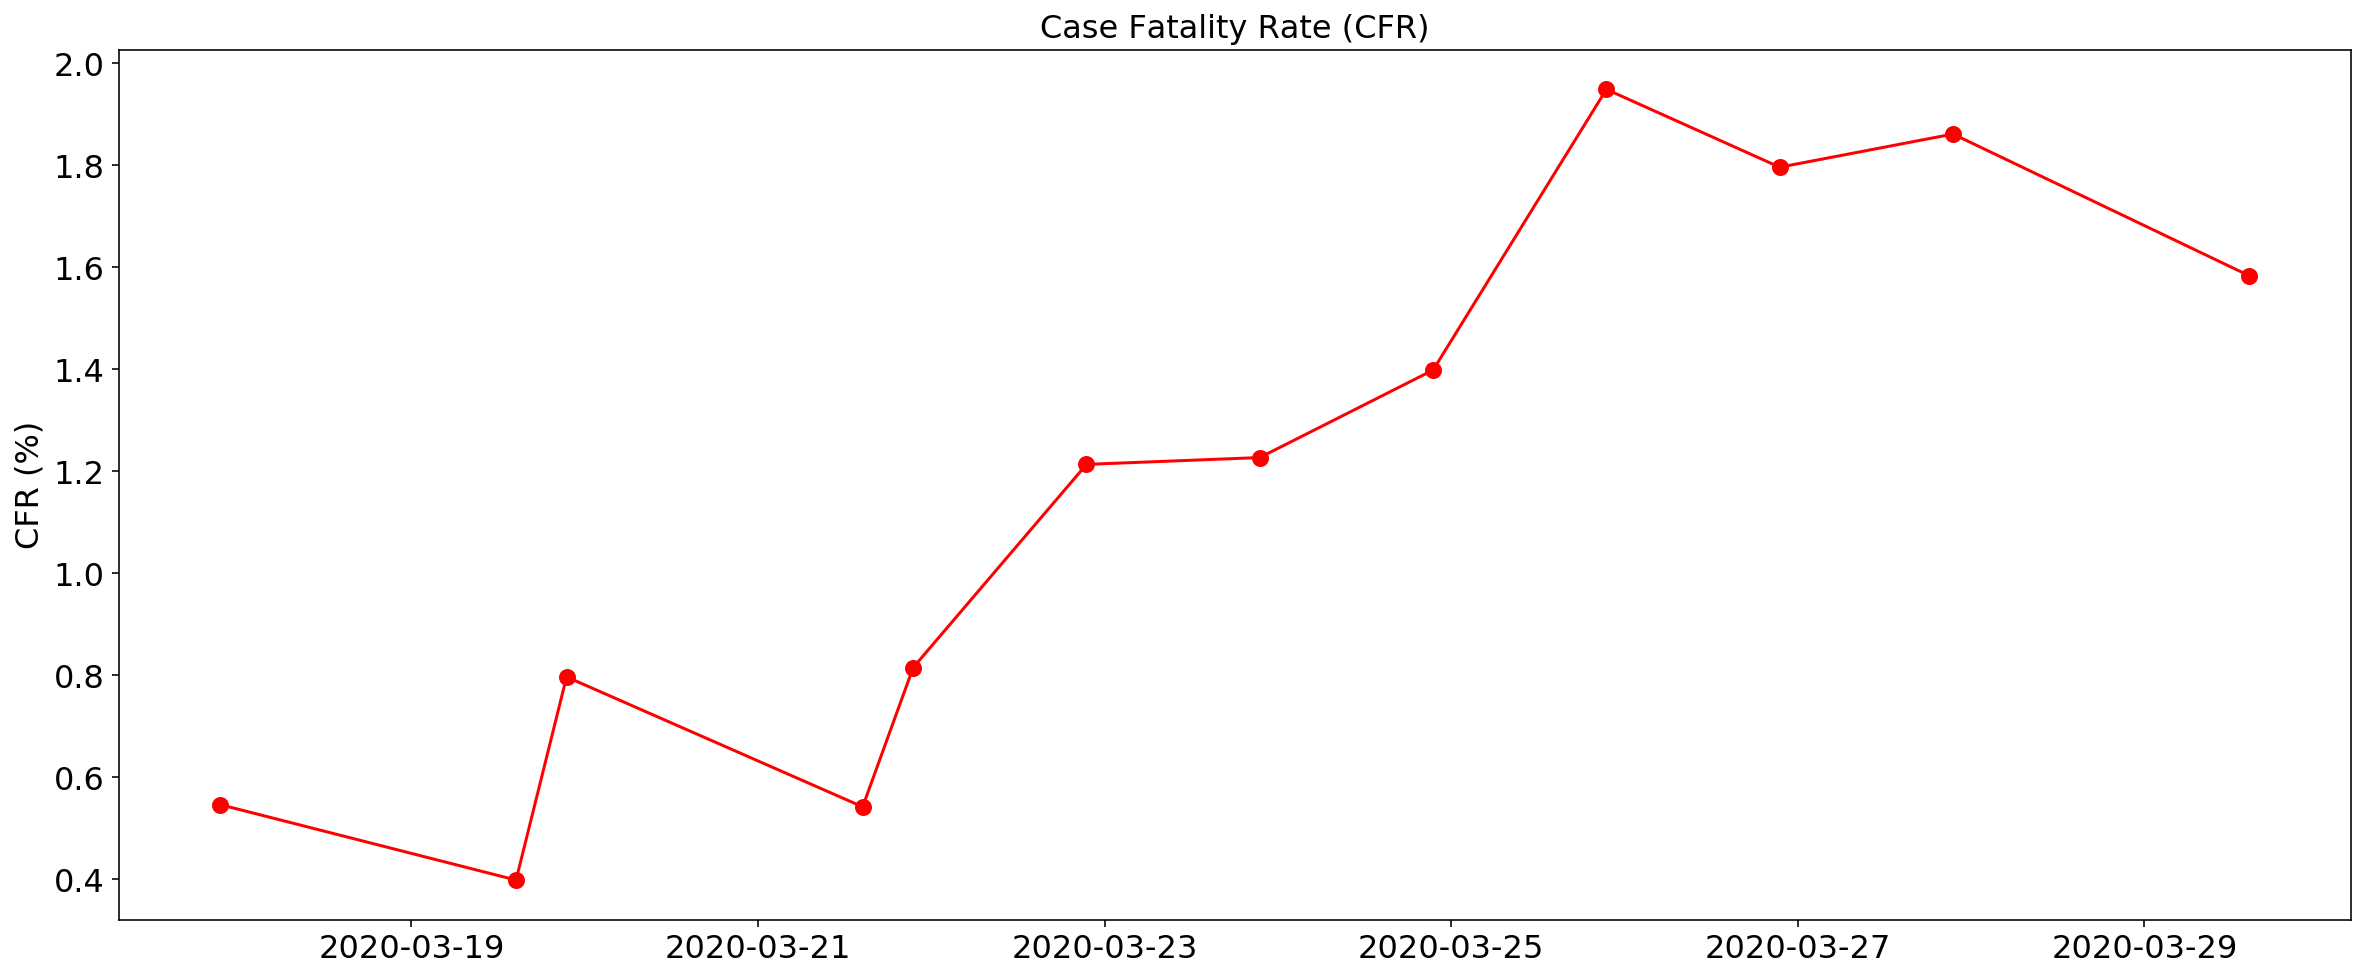

In [96]:
# Case Fatality Rate 
cfr_fig = plt.figure()
plt.title('Case Fatality Rate (CFR)')
plt.plot(frame['DataUpdated'], frame['Deceased']/frame['presumed_or_confirmed_positive']*100.0, marker='.',color='red')
plt.ylabel('CFR (%)')
plt.show()
cfr_fig.savefig('../plots/cfrplot_' + todaystring + '.png')